In [1]:
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.utils import to_categorical

In [2]:
# Load CIFAR-10 dataset
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

In [3]:
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(50000, 32, 32, 3)
(50000, 1)
(10000, 32, 32, 3)
(10000, 1)


In [4]:
# Normalize the images to the range [0, 1]
x_train = x_train / 255.0
x_test = x_test / 255.0

In [5]:
# Convert class vectors to binary class matrices (one-hot encoding)
y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)

In [6]:
# Define AlexNet model in Keras
input_shape=(32, 32, 3)
num_classes=10
alexnet_model = models.Sequential()

# Layer 1: Conv Layer
alexnet_model.add(Conv2D(96, (11, 11), strides=4, padding='same', input_shape=input_shape))
alexnet_model.add(layers.BatchNormalization())
alexnet_model.add(layers.Activation('relu'))
alexnet_model.add(MaxPooling2D(pool_size=(2, 2), strides=(1, 1)))

# Layer 2: Conv Layer
alexnet_model.add(Conv2D(256, (5, 5), padding='same'))
alexnet_model.add(layers.BatchNormalization())
alexnet_model.add(layers.Activation('relu'))
alexnet_model.add(MaxPooling2D(pool_size=(2, 2), strides=(1, 1)))

# Layer 3: Conv Layer
alexnet_model.add(Conv2D(384, (3, 3), padding='same'))

# Layer 4: Conv Layer
alexnet_model.add(Conv2D(384, (3, 3), padding='same'))


# Layer 5: Conv Layer
alexnet_model.add(Conv2D(256, (3, 3), padding='same'))
alexnet_model.add(layers.Activation('relu'))
alexnet_model.add(MaxPooling2D(pool_size=(2, 2), strides=(1, 1)))

# Flatten the data for Fully Connected Layers
alexnet_model.add(Flatten())

# Layer 6: Fully Connected Layer
alexnet_model.add(Dense(4096))
alexnet_model.add(layers.Activation('relu'))
alexnet_model.add(layers.Dropout(0.5))

# Layer 7: Fully Connected Layer
alexnet_model.add(Dense(4096))
alexnet_model.add(layers.Activation('relu'))
alexnet_model.add(layers.Dropout(0.5))

# Layer 8: Output Layer
alexnet_model.add(Dense(num_classes))
alexnet_model.add(layers.Activation('softmax'))

c:\Users\KH.EN.P2MCA24015\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [7]:
# #Do not run this code
# #Generalized definition of AlexNet
# # Define AlexNet model in Keras
# def AlexNet(input_shape=(32, 32, 3), num_classes=10):
#     model = models.Sequential()

#     # Layer 1: Conv Layer
#     model.add(layers.Conv2D(96, (11, 11), strides=4, padding='same', input_shape=input_shape))
#     model.add(layers.BatchNormalization())
#     model.add(layers.Activation('relu'))
#     model.add(layers.MaxPooling2D(pool_size=(3, 3), strides=(2, 2)))

#     # Layer 2: Conv Layer
#     model.add(layers.Conv2D(256, (5, 5), padding='same'))
#     model.add(layers.BatchNormalization())
#     model.add(layers.Activation('relu'))
#     model.add(layers.MaxPooling2D(pool_size=(3, 3), strides=(2, 2)))

#     # Layer 3: Conv Layer
#     model.add(layers.Conv2D(384, (3, 3), padding='same'))
#     model.add(layers.Activation('relu'))

#     # Layer 4: Conv Layer
#     model.add(layers.Conv2D(384, (3, 3), padding='same'))
#     model.add(layers.Activation('relu'))

#     # Layer 5: Conv Layer
#     model.add(layers.Conv2D(256, (3, 3), padding='same'))
#     model.add(layers.Activation('relu'))
#     model.add(layers.MaxPooling2D(pool_size=(3, 3), strides=(2, 2)))

#     # Flatten the data for Fully Connected Layers
#     model.add(layers.Flatten())

#     # Layer 6: Fully Connected Layer
#     model.add(layers.Dense(4096))
#     model.add(layers.Activation('relu'))
#     model.add(layers.Dropout(0.5))

#     # Layer 7: Fully Connected Layer
#     model.add(layers.Dense(4096))
#     model.add(layers.Activation('relu'))
#     model.add(layers.Dropout(0.5))

#     # Layer 8: Output Layer
#     model.add(layers.Dense(num_classes))
#     model.add(layers.Activation('softmax'))

#     return model

# # Define the model
# alexnet_model = AlexNet(input_shape=(32, 32, 3), num_classes=10)

In [8]:
# Compile the model
#alexnet_model.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])
alexnet_model.compile(optimizer=Adam(learning_rate=0.01),
                      loss='categorical_crossentropy',
                      metrics=['accuracy'])


In [9]:
alexnet_model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 8, 8, 96)       │        34,944 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 8, 8, 96)       │           384 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation (Activation)         │ (None, 8, 8, 96)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 7, 7, 96)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 7, 7, 256)      │       614,656 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1           │ (None, 7, 7, 256)      │         1,024 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_1 (Activation)       │ (None, 7, 7, 256)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 6, 6, 256)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 6, 6, 384)      │       885,120 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 6, 6, 384)      │     1,327,488 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (None, 6, 6, 256)      │       884,992 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_2 (Activation)       │ (None, 6, 6, 256)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 5, 5, 256)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 6400)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 4096)           │    26,218,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_3 (Activation)       │ (None, 4096)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 4096)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 4096)           │    16,781,312 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_4 (Activation)       │ (None, 4096)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 4096)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 10)             │        40,970 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_5 (Activation)       │ (None, 10)             │             0 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 46,789,386 (178.49 MB)

 Trainable params: 46,788,682 (178.48 MB)

 Non-trainable params: 704 (2.75 KB)

In [10]:
###---model architecture---
tf.keras.utils.plot_model(alexnet_model,show_layer_names=True,show_shapes=True,show_dtype=False)

You must install pydot (`pip install pydot`) for `plot_model` to work.


In [11]:
# Create data augmentation generator
datagen = ImageDataGenerator(
    width_shift_range=0.1,  # randomly shift images horizontally
    height_shift_range=0.1,  # randomly shift images vertically
    horizontal_flip=True     # randomly flip images horizontally
)

In [12]:
datagen.fit(x_train)

In [ ]:
# Train the model
history = alexnet_model.fit(datagen.flow(x_train, y_train, batch_size=512),
                            epochs=2,
                            validation_data=(x_test, y_test),
                            verbose=1)

NameError: name 'alexnet_model' is not defined

In [14]:
# Evaluate the model
test_loss, test_acc = alexnet_model.evaluate(x_test, y_test, verbose=2)
print(f'Test accuracy: {test_acc:.4f}')

313/313 - 28s - 88ms/step - accuracy: 0.1000 - loss: 2.3026
Test accuracy: 0.1000


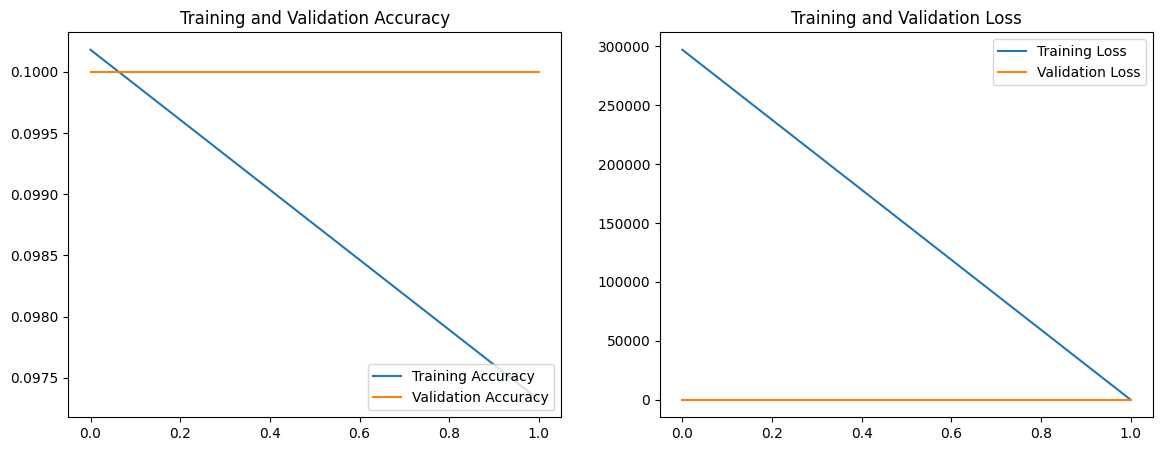

In [15]:
# Plot training and validation accuracy and loss
import matplotlib.pyplot as plt
plt.figure(figsize=(14, 5))

plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')

plt.savefig('./foo.png')
plt.show()